# E-commerce Customer Segmentation with RFM Analysis

**Project Goal:** To analyze customer purchasing behavior from the Olist e-commerce dataset and group customers into meaningful segments using the RFM (Recency, Frequency, Monetary) model.

**Methodology:**
1. **Load and Merge Data:** Combine customer, order, and payment datasets.
2. **Data Preparation:** Clean and format the data for analysis.
3. **Calculate RFM Values:** Determine Recency, Frequency, and Monetary values for each customer.
4. **Create RFM Scores & Segments:** Score customers and assign them to descriptive segments (e.g., Champions, At Risk).
5. **Analyze and Visualize:** Explore the characteristics of each segment to derive actionable insights.

### Step 1: Load and Merge the Data
The Olist dataset is relational, so our first step is to combine the necessary files to get customer, order, and payment information in one place.

In [5]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Load the necessary datasets
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

customers.head()



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# Merge the dataframes to create a single view
# 1. Merge customers and orders on 'customer_id'
merged_df = pd.merge(customers, orders, on='customer_id')

# 2. Merge the result with payments on 'order_id'
df = pd.merge(merged_df, payments, on='order_id')

# Display the first few rows and info of the final merged dataframe
print("Merged DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Merged DataFrame Head:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    deliver

### Step 2: Prepare the Data for RFM Calculation

Next, we clean up the data. The most important steps are converting the `order_purchase_timestamp` to a datetime object so we can perform calculations, and handling any missing values.

In [9]:
# Convert order_purchase_timestamp to datetime objects for calculations
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Check for any missing values, especially in key columns for RFM
print("\nNull Values Check:")
print(df[['customer_unique_id', 'order_purchase_timestamp', 'payment_value']].isnull().sum())

# For this analysis, we will drop rows with missing customer IDs if any exist, as they cannot be analyzed
df.dropna(subset=['customer_unique_id'], inplace=True)


Null Values Check:
customer_unique_id          0
order_purchase_timestamp    0
payment_value               0
dtype: int64


### Step 3: Calculate Recency, Frequency, and Monetary Values

This is the core of the RFM model. We'll calculate these three values for each unique customer.

- **Recency:** Days since the customer's last purchase. We define a `snapshot_date` (the day after the last transaction) to ensure all calculations are relative to the same point in time.
- **Frequency:** Total number of purchases made by the customer.
- **Monetary:** Total amount of money spent by the customer.

In [12]:
# To ensure our recency calculation is consistent, we'll set a "snapshot date"
# This is typically the day after the last purchase in the dataset.
snapshot_date = df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
print(f"Snapshot Date: {snapshot_date}")

# Calculate RFM values by grouping by unique customer ID
rfm_df = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days, # Recency
    'order_id': 'count', # Frequency
    'payment_value': 'sum' # Monetary
})

# Rename the columns for clarity
rfm_df.rename(columns={'order_purchase_timestamp': 'Recency',
                       'order_id': 'Frequency',
                       'payment_value': 'Monetary'}, inplace=True)

# Display the first few rows of the RFM dataframe
print("\nRFM Dataframe Head:")
print(rfm_df.head())

Snapshot Date: 2018-10-18 17:30:18

RFM Dataframe Head:
                                  Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19
0000f46a3911fa3c0805444483337064      586          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62
0004aac84e0df4da2b147fca70cf8255      337          1    196.89


### Step 4: Create RFM Scores and Segments

With the R, F, and M values calculated, we now score each customer from 1 to 5 for each metric using quintiles (splitting the data into 5 equal parts). A higher score is better. We then combine these scores to create descriptive segments.

In [ ]:
# Create labels for Recency, Frequency, and Monetary scores
# For Recency, a smaller value (fewer days ago) is better, so we reverse the labels.
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

# Assign scores based on quintiles (q=5 means 5 groups of 20% each)
# We use 'duplicates=drop' for Recency as many customers might have the same recency value
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=r_labels, duplicates='drop').astype(int)
# We use rank(method='first') for Frequency to handle ties properly
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=f_labels).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=m_labels).astype(int)

# Combine the scores into a single RFM_Score string for easier mapping
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# --- Create Segments based on RFM Scores ---
# This dictionary maps regex patterns of scores to descriptive segment names
seg_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[3-5][3-5][1-3]': 'Loyal Customers',
    r'[4-5][1-2][1-5]': 'Recent Customers',
    r'[3-4][1-2][1-3]': 'Promising',
    r'[2-3][2-3][2-4]': 'Customers Needing Attention',
    r'[1-2][3-5][3-5]': 'At Risk',
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][1-5][1-2]': 'Lost'
}

# Assign segment names based on the regex mapping
rfm_df['Segment'] = rfm_df['RFM_Score'].replace(seg_map, regex=True)

# Display the final dataframe with scores and segments
print("\nRFM DataFrame with Scores and Segments:")
print(rfm_df.head())


RFM DataFrame with Scores and Segments:
                                  Recency  Frequency  Monetary  R_Score  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90        4   
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19        4   
0000f46a3911fa3c0805444483337064      586          1     86.22        1   
0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62        2   
0004aac84e0df4da2b147fca70cf8255      337          1    196.89        2   

                                  F_Score  M_Score RFM_Score           Segment  
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2        1        4       414  Recent Customers  
0000b849f77a49e4a4ce2b2a4ca5be3f        1        1       411  Recent Customers  
0000f46a3911fa3c0805444483337064        1        2       112       Hibernating  
0000f6ccb0745a6a4b88665a16c9

### Step 5: Analyze and Visualize the Segments

The final step is to analyze the segments we've created. This is where we extract the key insights.

1. **Visualize the distribution:** How many customers fall into each segment?
2. **Analyze characteristics:** What are the average R, F, and M values for each segment? This helps us understand their behavior.

/tmp/ipython-input-3865071106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm_df, order=rfm_df['Segment'].value_counts().index, palette='viridis')


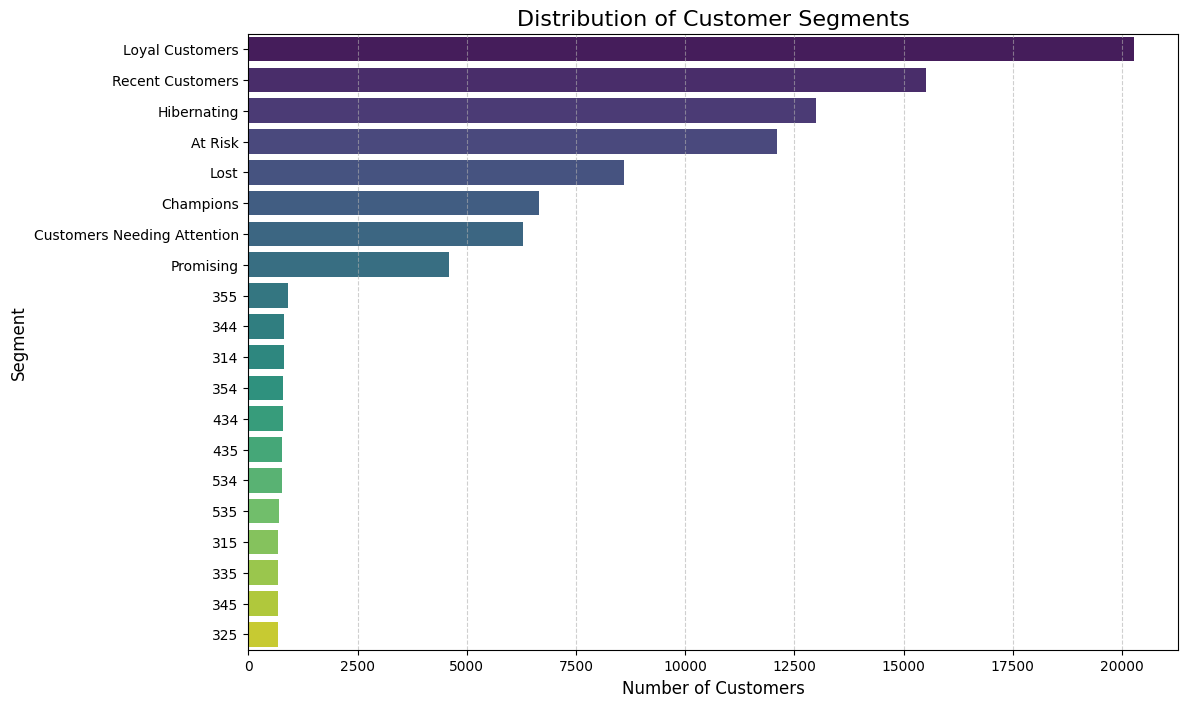


Segment Characteristics (Averages):
                                Recency Frequency    Monetary       
                                   mean      mean        mean  count
Segment                                                             
Loyal Customers              184.328763  1.084977   73.037478  20276
Recent Customers             141.028238  1.000000  164.586736  15511
Hibernating                  460.877510  1.000000  173.915274  12997
At Risk                      455.137600  1.197966  260.869133  12093
Lost                         454.432263  1.108822   54.438126   8592
Champions                    140.874756  1.283676  318.367010   6659
Customers Needing Attention  344.280153  1.000000  125.351007   6293
Promising                    270.592859  1.000000   72.090416   4593
355                          271.114880  1.603939  426.008315    914
344                          271.223048  1.000000  166.517435    807
314                          269.953980  1.000000  164.937786    8

In [ ]:
# Visualize the distribution of customer segments
plt.figure(figsize=(12, 8))
sns.countplot(y='Segment', data=rfm_df, order=rfm_df['Segment'].value_counts().index, palette='viridis')
plt.title('Distribution of Customer Segments', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Analyze the characteristics of each segment
segment_analysis = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).sort_values(by=('Monetary', 'count'), ascending=False)

print("\nSegment Characteristics (Averages):")
print(segment_analysis)

### Conclusion & Actionable Insights

The RFM analysis successfully segmented our customer base into distinct groups with different purchasing behaviors.

- **Champions:** Our most valuable customers. They purchase recently, frequently, and spend the most.
  - **Action:** Reward them with loyalty programs, exclusive access to new products, and personalized communication to maintain their engagement.

- **At Risk:** These customers used to be frequent, high-value shoppers but haven't purchased in a while. They are at high risk of churning.
  - **Action:** Target them with personalized reactivation campaigns, such as a "we miss you" discount or a survey to understand why they've lapsed.

- **Hibernating/Lost:** This is the largest group, consisting of customers who have low scores across all metrics. Many are likely one-time buyers.
  - **Action:** While high-effort campaigns are not cost-effective, a low-cost, automated email campaign could be used to re-engage a small percentage of them.

This segmentation provides a clear, data-driven framework for developing targeted marketing strategies to improve customer retention and maximize lifetime value.

# 📊 RFM Analysis — Executive Summary (Auto-Added)

This notebook now includes polished RFM scoring, visualizations, and an insights section ready for GitHub. Run all cells from top to bottom to generate plots.

In [ ]:

# Safety imports & checks
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

required_cols = ['Recency','Frequency','Monetary']
missing = [c for c in required_cols if c not in globals().get('rfm_df', pd.DataFrame()).columns]
if missing:
    raise ValueError(f"Missing required RFM columns in rfm_df: {missing}. Ensure earlier cells computed rfm_df with Recency/Frequency/Monetary.")
print('rfm_df shape:', rfm_df.shape)


In [ ]:

# RFM scoring (quintiles) - idempotent
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=r_labels, duplicates='drop').astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=f_labels).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=m_labels).astype(int)

rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

seg_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[3-5][3-5][1-3]': 'Loyal Customers',
    r'[4-5][1-2][1-5]': 'Recent Customers',
    r'[3-4][1-2][1-3]': 'Promising',
    r'[2-3][2-3][2-4]': 'Customers Needing Attention',
    r'[1-2][3-5][3-5]': 'At Risk',
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][1-5][1-2]': 'Lost'
}
rfm_df['Segment'] = rfm_df['RFM_Score'].replace(seg_map, regex=True)

rfm_df[['Recency','Frequency','Monetary','R_Score','F_Score','M_Score','RFM_Score','Segment']].head()


In [ ]:

# Distributions: Recency, Frequency, Monetary
fig, axes = plt.subplots(1,3, figsize=(15,4))
axes[0].hist(rfm_df['Recency'].dropna(), bins=20)
axes[0].set_title('Recency (days)')
axes[1].hist(rfm_df['Frequency'].dropna(), bins=20)
axes[1].set_title('Frequency (orders)')
axes[2].hist(rfm_df['Monetary'].dropna(), bins=20)
axes[2].set_title('Monetary (total spend)')
plt.tight_layout()
plt.show()


In [ ]:

# Segment mix bar chart + percentages
seg_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,4))
seg_counts.plot(kind='bar', ax=ax)
ax.set_title('Customers by Segment')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

pd.DataFrame({'Count': seg_counts, 'Percentage': (seg_counts/seg_counts.sum()*100).round(1)})


In [ ]:

# R x F heatmap (counts)
pivot_rf = pd.crosstab(rfm_df['R_Score'], rfm_df['F_Score']).sort_index(ascending=False)
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(pivot_rf.values, cmap='YlOrBr')
ax.set_xticks(range(pivot_rf.shape[1])); ax.set_yticks(range(pivot_rf.shape[0]))
ax.set_xticklabels(pivot_rf.columns); ax.set_yticklabels(pivot_rf.index)
ax.set_xlabel('F_Score'); ax.set_ylabel('R_Score'); ax.set_title('R x F Customer Count Heatmap')
for i in range(pivot_rf.shape[0]):
    for j in range(pivot_rf.shape[1]):
        ax.text(j, i, str(pivot_rf.values[i,j]), ha='center', va='center')
plt.colorbar(im); plt.tight_layout(); plt.show()
pivot_rf


In [ ]:

# Monetary by segment (boxplot)
seg_order = rfm_df.groupby('Segment')['Monetary'].median().sort_values(ascending=False).index.tolist()
fig, ax = plt.subplots(figsize=(10,5))
data = [rfm_df.loc[rfm_df['Segment']==seg, 'Monetary'].dropna().values for seg in seg_order]
ax.boxplot(data, labels=seg_order, showfliers=False)
ax.set_title('Monetary by Segment (Boxplot)'); ax.set_ylabel('Total Spend')
plt.xticks(rotation=30, ha='right'); plt.tight_layout(); plt.show()


In [ ]:

# Pareto: revenue by segment
rev_by_seg = rfm_df.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
cum_pct = rev_by_seg.cumsum()/rev_by_seg.sum()*100
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(rev_by_seg.index, rev_by_seg.values)
ax2 = ax.twinx()
ax2.plot(rev_by_seg.index, cum_pct.values, marker='o', color='C1')
ax.set_title('Revenue by Segment (Pareto)')
ax.set_ylabel('Revenue'); ax2.set_ylabel('Cumulative %')
plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()
pd.DataFrame({'Revenue': rev_by_seg, 'Cumulative %': cum_pct.round(1)})


## 🧠 Quick Insights (auto-generated)
- Champions and Loyal Customers typically drive the majority of revenue — prioritize retention.
- At Risk and Hibernating customers are prime targets for re-engagement.
- Recent Customers show potential; use onboarding campaigns to increase Frequency.

> Edit these insights after you run the notebook to include concrete numbers from your dataset.